# K-Nearest Neighbour


K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). A new record is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

Suppose you want to find out the class of the blue star (BS) in the image below. BS can either be RC or GS. The “K” is KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with BS as the center just as big as to enclose only three datapoints on the plane. The three closest points to BS is all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm.

<img src="img1.png">

The distance functions used for Numeric fields are given below:
<img src="img2.png">

### Libraries useful in K-NN are listed below

### Get The Data. Load data "spambase_data.csv"

In [2]:
import pandas as pd
df = pd.read_csv('spambase_data.csv',header =None)
df.head() # used to display top 5 rows

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Train and Test Split

In [3]:
X = df[df.columns[:-1]] # Selecting the independent variables
Y=df[df.columns[len(df.columns)-1]] # selecting only the target lableled column

#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

This method is called the Hold Out Method.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Import the k-NN Classifier library

In [5]:
from sklearn.neighbors import KNeighborsClassifier

### Train 3-NN by using euclidean distance as distance measure

In [6]:
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

### Prediction and Evaluation

In [7]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
predictions = knn.predict(X_test)

In [9]:
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       863
           1       0.74      0.72      0.73       518

    accuracy                           0.80      1381
   macro avg       0.79      0.78      0.78      1381
weighted avg       0.80      0.80      0.80      1381

Confusion Matrix
[[730 133]
 [145 373]]

 Accuracy
0.7986965966690803


###  k (5)- fold method for training and testing split and check the difference in performance of 3-NN 

In [10]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [0.77090119 0.78586957 0.825      0.80543478 0.69456522]
mean score:  0.7763541519142709


#### Q1: Normalize the dataset and apply 3-NN using both euclidean and manhattan distance

In [11]:
# min-max scaling normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# splitting into test and train datasets again
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.30, random_state = 30)

# euclidean distance
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

# manhattan distance
knn=KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       863
           1       0.89      0.84      0.86       518

    accuracy                           0.90      1381
   macro avg       0.90      0.89      0.89      1381
weighted avg       0.90      0.90      0.90      1381

Confusion Matrix
[[809  54]
 [ 84 434]]

 Accuracy
0.9000724112961622
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       863
           1       0.90      0.83      0.86       518

    accuracy                           0.90      1381
   macro avg       0.90      0.89      0.89      1381
weighted avg       0.90      0.90      0.90      1381

Confusion Matrix
[[818  45]
 [ 90 428]]

 Accuracy
0.9022447501810282


#### Q2: Write your observation regarding change in the perfromance of KNN

In [12]:
"""
Normalization has clearly increased the accuracy. Earlier for euclidean distance the accuracy was only 0.798
but now it has jumped to 0.9. The accuracy is even higher 0.902 for manhattan distance. Further more false
positives and false negatives have decreased in the confusion matrix.
"""

'\nNormalization has clearly increased the accuracy. Earlier for euclidean distance the accuracy was only 0.798\nbut now it has jumped to 0.9. The accuracy is even higher 0.902 for manhattan distance. Further more false\npositives and false negatives have decreased in the confusion matrix.\n'

#### Q3: Find the accuracy of 1-NN model (using euclidean distance)

In [13]:
#### Code here ####
# IMPORTANT: I will be using normalized dataset here.
knn=KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))


 Accuracy
0.9000724112961622


#### Q4: Find the accuracy of the models by taking k from 1 to 20. (Using euclidean distance and k(5)-fold method for train-test split)

In [19]:
#### Code here ####
acc, num = [], []
for k in range(20):
    knn_cv = KNeighborsClassifier(n_neighbors=k+1, metric = 'euclidean')
    scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
    acc.append(scores.mean())
    num.append(k+1)
    print(acc[k])

0.7767891705612991
0.765052872586508
0.7763541519142709
0.7674441769343341
0.7724458292026626
0.7600590095831563
0.7687518292970779
0.7596244630127932
0.7596246990511258
0.759841854317141
0.7602778171175
0.7535377425293868
0.7567988481329367
0.7561464381815608
0.7531039040740216
0.7541880281357692
0.7552764008875041
0.7531003634990322
0.7559271585705518
0.7541873200207714


#### Q5: Plot the graph between k and the accuracy score and find the best value of k

1


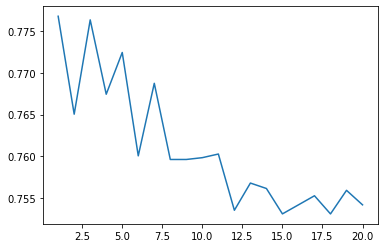

In [25]:
#### Write your answer here ####
import matplotlib.pyplot as plt
plt.plot(num, acc)
max, k = acc[0], 1
for i in range(20):
    if max < acc[i]:
        max = acc[i]
        k = i + 1
print(k)

#### Q6: Find the accuracy of the models by taking k from 1 to 20. (Using manhattan distance  k(5)-fold method for train-test split)

In [26]:
#### Code here ####
acc, num = [], []
for k in range(20):
    knn_cv = KNeighborsClassifier(n_neighbors=k+1, metric = 'manhattan')
    scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
    acc.append(scores.mean())
    num.append(k+1)
    print(acc[k])

0.8050427229382052
0.7917865741396403
0.797435443516027
0.7963517915309446
0.796351555492612
0.7924406363593448
0.7970051456356512
0.7961360524949251
0.8020039654439881
0.7950507482415144
0.7976592078553557
0.7913558041825992
0.792659679932021
0.7922260775149884
0.7900526365481755
0.7883132700750602
0.7904848227352121
0.786573195486947
0.7926594438936883
0.7880944625407167


#### Q7:  Plot the graph between k and the accuracy score and find the best value of k

1


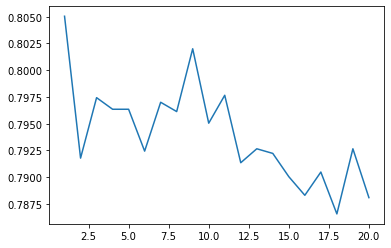

In [27]:
#### Write your answer here ####
plt.plot(num, acc)
max, k = acc[0], 1
for i in range(20):
    if max < acc[i]:
        max = acc[i]
        k = i + 1
print(k)

#### Q8: Write your observation

In [28]:
#### Code here ####
"""
There are accuracy crests for odd values of k and troughs for even values.
Furthermore, accuracy is highest for k = 1.
"""

'\nThere are accuracy crests for odd values of k and troughs for even values.\nFurthermore, accuracy is highest for k = 1.\n'

#### Q9: Implement the weighted k-NN model. Use k(5)-fold method for train-test split

In [30]:
#### Code here ####
acc, num = [], []
for k in range(20):
    knn_cv = KNeighborsClassifier(n_neighbors=k+1, weights = 'distance', metric = 'euclidean')
    scores = cross_val_score(knn_cv, X, Y, cv=5, scoring='accuracy')
    acc.append(scores.mean())
    num.append(k+1)
    print(acc[k])

0.7767891705612991
0.7772237171316622
0.7880921021573903
0.7891785866024643
0.7883113817683991
0.7930923381957229
0.7878775433130342
0.7896162016711514
0.7807052825378842
0.7822279658216494
0.7826627484303451
0.7822282018599821
0.7787506491054148
0.7804907236935278
0.7780989472690364
0.7828799036963604
0.7780989472690365
0.7789675683330973
0.7759238540338951
0.7802709720058537


#### Q10: What is the best k value in this model. Take max k =20

6


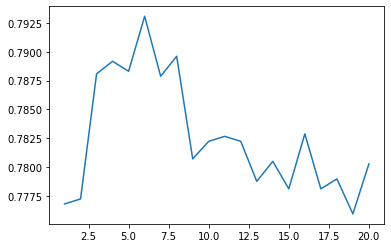

In [31]:
#### Write your answer here ####
plt.plot(num, acc)
max, k = acc[0], 1
for i in range(20):
    if max < acc[i]:
        max = acc[i]
        k = i + 1
print(k)